In [23]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [24]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [25]:
def rho_green_light(x,rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x<2.0)
    rho[mask]=rho_light*x[mask]/2
    return rho
def flux(rho,umax,rhomax):
    F = rho*umax*(1.0-rho/rhomax)
    return F
def ftbs(rho,nt,dt,dx,bc_value,*args):
    rho_hist = [rho.copy()]
    rho = rho0.copy()
    for n in range (nt):
        F = flux(rho,*args)
        rho[1:]=rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho[0]=bc_value
        rho_hist.append(rho.copy())
    return rho_hist

In [26]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 30
umax=1.0
rhomax=10.0
rho_light = 10.0
x = numpy.linspace(0.0,L,num=nx)
rho0 = rho_green_light(x,rho_light)


In [27]:
def rho_green_light(x,rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x<2.0)
    rho[mask]=rho_light*x[mask]/2
    return rho
def flux(rho,umax,rhomax):
    F = rho*umax*(1.0-rho/rhomax)
    return F
def ftbs(rho,nt,dt,dx,bc_value,*args):
    rho_hist = [rho.copy()]
    rho = rho0.copy()
    for n in range (nt):
        F = flux(rho,*args)
        rho[1:]=rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho[0]=bc_value
        rho_hist.append(rho.copy())
    return rho_hist

sigma = 1.0
dt = sigma*dx/umax
rho_hist = ftbs(rho0,nt,dt,dx,rho0[0],umax,rhomax)

from matplotlib import animation
from IPython.display import HTML


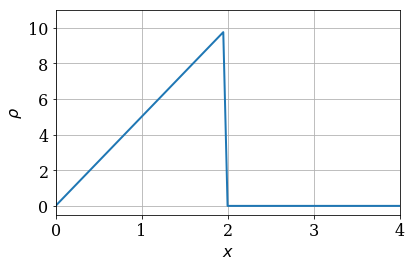

In [28]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                    color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [37]:
def update_plot(nt):
    fig = pyplot.figure(figsize=(6.0,4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x,rho_hist[nt],color='C1', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0,L)
    pyplot.ylim(-0.5,11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))
import ipywidgets
nt_slider = ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,description='time step')
w = ipywidgets.interactive(update_plot,nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=30), Output()), _dom_classes=('widget-in…